# Convolution Neural Network - Fashion MNIST

CNN allow us to extract the features of the image while maintaining the spatial arrangement of the image. 

Lets apply this to the Fashion MNIST Example

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
% matplotlib inline
import vis

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from keras import backend as K

## Get Data

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
import importlib
importlib.reload(vis)

<module 'vis' from '/Users/amitkaps/Dropbox/github/deep-learning/vis.py'>

In [6]:
labels = vis.fashion_mnist_label()

**Step 1: Prepare the images and labels**

Reshape data for convolution network

In [7]:
K.image_data_format()

'channels_last'

In [8]:
x_train_conv = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

Convert from 'uint8' to 'float32' and normalise the data to (0,1) 

In [9]:
x_train_conv =  x_train_conv.astype("float32") / 255
x_test_conv = x_test_conv.astype("float32") / 255

Convert class vectors to binary class matrices

In [10]:
# convert class vectors to binary class matrices
y_train_class = keras.utils.to_categorical(y_train, 10)
y_test_class = keras.utils.to_categorical(y_test, 10)

## Model 1: Simple Convolution

**Step 2: Craft the feature transfomation and classifier model **

In [32]:
model_simple_conv = Sequential()
model_simple_conv.add(Conv2D(32, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_simple_conv.add(Flatten())
model_simple_conv.add(Dense(100, activation='relu'))
model_simple_conv.add(Dense(10, activation='softmax'))

In [33]:
model_simple_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_5 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               2163300   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 2,164,630
Trainable params: 2,164,630
Non-trainable params: 0
_________________________________________________________________


**Step 3: Compile and fit the model**

In [13]:
model_simple_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [14]:
%%time 
output_simple_conv = model_simple_conv.fit(x_train_conv, y_train_class, batch_size=128, epochs=5, verbose=2,
                    validation_data=(x_test_conv, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 45s - loss: 0.8339 - acc: 0.7255 - val_loss: 0.7958 - val_acc: 0.6926
Epoch 2/5
 - 45s - loss: 0.5556 - acc: 0.8036 - val_loss: 0.5383 - val_acc: 0.8099
Epoch 3/5
 - 48s - loss: 0.4947 - acc: 0.8256 - val_loss: 0.5097 - val_acc: 0.8186
Epoch 4/5
 - 46s - loss: 0.4650 - acc: 0.8375 - val_loss: 0.4686 - val_acc: 0.8373
Epoch 5/5
 - 44s - loss: 0.4413 - acc: 0.8450 - val_loss: 0.4791 - val_acc: 0.8276
CPU times: user 9min 23s, sys: 1min 11s, total: 10min 34s
Wall time: 3min 48s


**Step 4: Check the performance of the model**

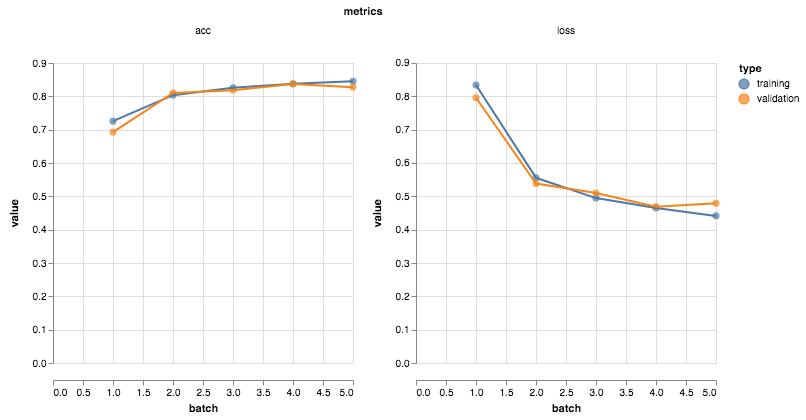

In [15]:
vis.metrics(output_simple_conv.history)

In [16]:
score = model_simple_conv.evaluate(x_test_conv, y_test_class, verbose=1)

10000/10000 [==============================] - 4s 375us/step


In [17]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.479082851648
Test accuracy: 0.8276


**Step 5: Make & Visualise the Prediction**

In [18]:
predict_classes_conv = model_simple_conv.predict_classes(x_test_conv)

In [19]:
pd.crosstab(y_test, predict_classes_conv)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,883,4,19,27,0,2,51,0,14,0
1,8,957,4,24,2,0,4,0,1,0
2,24,7,834,12,44,1,68,0,10,0
3,56,24,15,854,13,0,35,0,3,0
4,3,3,260,58,494,0,174,0,8,0
5,0,0,0,1,0,896,0,78,4,21
6,224,2,143,25,34,1,540,0,31,0
7,0,0,0,0,0,23,0,962,0,15
8,6,1,15,7,1,4,13,9,944,0


In [20]:
proba_conv = model_simple_conv.predict_proba(x_test_conv)

In [21]:
i = 4

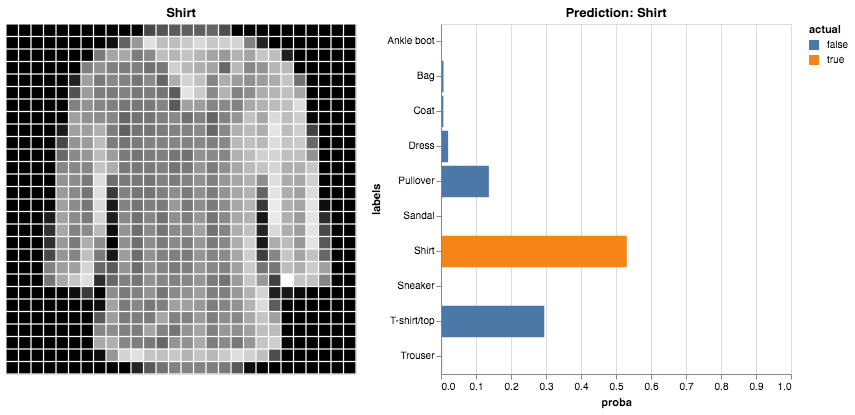

In [22]:
vis.imshow(x_test[i], labels[y_test[i]]) | vis.predict(proba_conv[i], y_test[i], labels)

## Model 2: Convulation + Max Pooling

**Step 2: Craft the feature transfomation and classifier model **

In [34]:
model_pooling_conv = Sequential()
model_pooling_conv.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Flatten())
model_pooling_conv.add(Dense(128, activation='relu'))
model_pooling_conv.add(Dense(10, activation='softmax'))

In [35]:
model_pooling_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total para

**Step 3: Compile and fit the model**

In [36]:
model_pooling_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [37]:
%%time 
output_pooling_conv = model_pooling_conv.fit(x_train_conv, y_train_class, batch_size=128, epochs=5, verbose=2,
                    validation_data=(x_test_conv, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 60s - loss: 1.4402 - acc: 0.5333 - val_loss: 1.0207 - val_acc: 0.6643
Epoch 2/5
 - 54s - loss: 0.7685 - acc: 0.7158 - val_loss: 0.7132 - val_acc: 0.7483
Epoch 3/5


KeyboardInterrupt: 

**Step 4: Check the performance of the model**

In [ ]:
vis.metrics(output_pooling_conv.history)

In [ ]:
score = model_pooling_conv.evaluate(x_test_conv, y_test_class, verbose=1)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

**Step 5: Make & Visualise the Prediction**

In [ ]:
predict_classes_pooling = model_pooling_conv.predict_classes(x_test_conv)

In [ ]:
pd.crosstab(y_test, predict_classes_pooling)

In [ ]:
proba_pooling = model_pooling_conv.predict_classes(x_test_conv)

In [ ]:
vis.imshow(x_test[i], labels[y_test[i]]) | vis.predict(proba_conv[i], y_test[i], labels)

## Model 3: Convulation + Max Pooling + Dropout

**Step 2: Craft the feature transfomation and classifier model **

In [ ]:
model_dropout_conv = Sequential()
model_dropout_conv.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_dropout_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_dropout_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_conv.add(Dropout(0.25))
model_dropout_conv.add(Flatten())
model_dropout_conv.add(Dense(128, activation='relu'))
model_dropout_conv.add(Dropout(0.5))
model_dropout_conv.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_dropout_conv.summary()

**Step 3: Compile and fit the model**

In [ ]:
model_dropout_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
%%time 
output_dropout_conv = model_dropout_conv.fit(x_train_conv, y_train_class, batch_size=128, epochs=10, verbose=2,
                    validation_data=(x_test_conv, y_test_class))

**Step 4: Check the performance of the model**

In [ ]:
vis.metrics(output_dropout_conv.history)

In [ ]:
score = model_dropout_conv.evaluate(x_test_conv, y_test_class, verbose=1)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

**Step 5: Make & Visualise the Prediction**

In [ ]:
predict_classes_dropout = model_conv_dropout.predict_classes(x_test_conv)

In [ ]:
pd.crosstab(y_test, predict_classes_dropout)

In [ ]:
proba_pooling = model_dropout_conv.predict_classes(x_test_conv)

In [ ]:
vis.imshow(x_test[i], labels[y_test[i]]) | vis.predict(proba_pooling[i], y_test[i], labels)